In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Prepare the data
X = mnist.data.values.astype('float32')
y = mnist.target.values.astype('int64')

d:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
import numpy as np
max_value = np.max(X)
max_value

255.0

In [20]:
min_value = np.min(X)
min_value

0.0

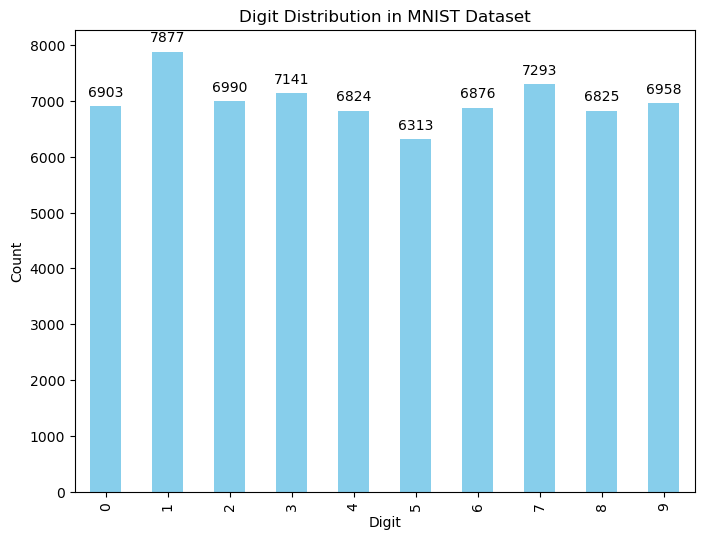

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Convert the target values to a pandas Series for easy visualization
y_series = pd.Series(y)

# Plot the distribution of labels with count numbers on top
plt.figure(figsize=(8, 6))
ax = y_series.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Display count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Digit Distribution in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X.shape

(70000, 784)

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train.shape

(56000, 784)

In [26]:
import numpy as np
max_value = np.max(X_train)
max_value

1.0

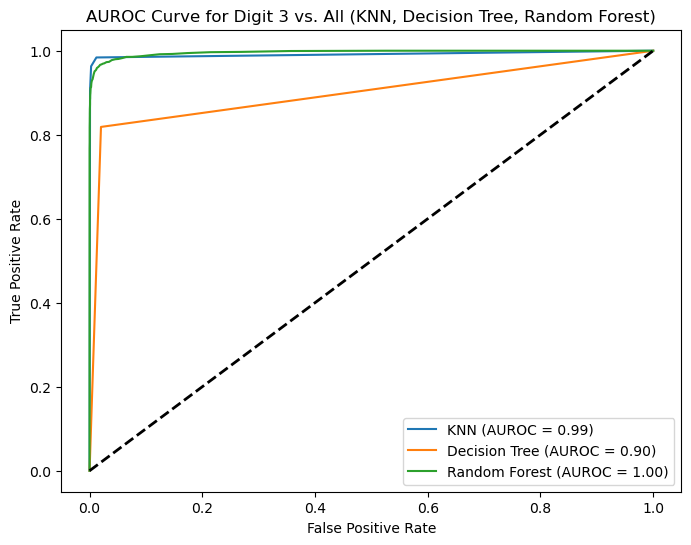

In [27]:
#Comparison Of Model Performance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Binary labels for binary classification (digit 3 vs. all other digits)
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

classifiers = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf}

# Plot AUROC for each classifier
plt.figure(figsize=(8, 6))

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train_3)

    # Compute ROC curve and AUROC
    fpr, tpr, _ = roc_curve(y_test_3, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot AUROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUROC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve for Digit 3 vs. All (KNN, Decision Tree, Random Forest)')
plt.legend(loc="lower right")
plt.show()


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

# Train models
models = [dt, rf, knn]
model_names = ['Decision Tree', 'Random Forest', 'KNN']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.4f}')

Decision Tree accuracy: 0.8696
Random Forest accuracy: 0.9675
KNN accuracy: 0.9729


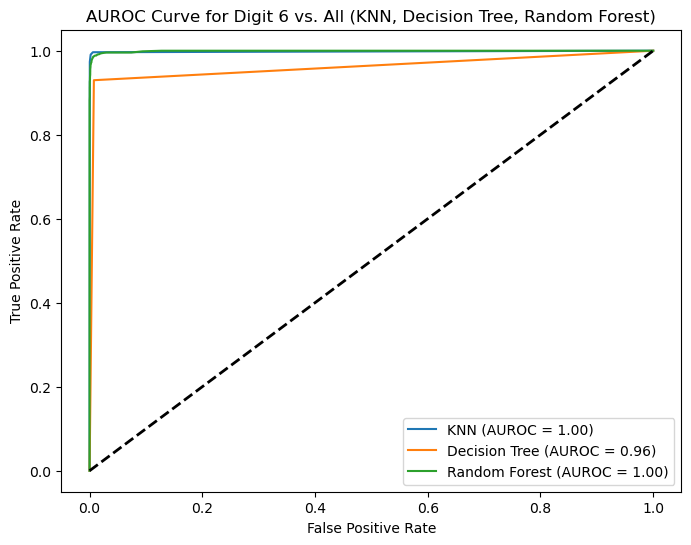

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Binary labels for binary classification (digit 6 vs. all other digits)
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

classifiers = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf}

# Plot AUROC for each classifier
plt.figure(figsize=(8, 6))

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train_6)

    # Compute ROC curve and AUROC
    fpr, tpr, _ = roc_curve(y_test_6, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot AUROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUROC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve for Digit 6 vs. All (KNN, Decision Tree, Random Forest)')
plt.legend(loc="lower right")
plt.show()


K=1, Average Cross-Validation Score: 0.9699
K=1, Accuracy Score: 0.9720
K=3, Average Cross-Validation Score: 0.9701
K=3, Accuracy Score: 0.9713
K=5, Average Cross-Validation Score: 0.9688
K=5, Accuracy Score: 0.9701
K=7, Average Cross-Validation Score: 0.9679
K=7, Accuracy Score: 0.9687
K=9, Average Cross-Validation Score: 0.9664
K=9, Accuracy Score: 0.9674
K=11, Average Cross-Validation Score: 0.9654
K=11, Accuracy Score: 0.9654


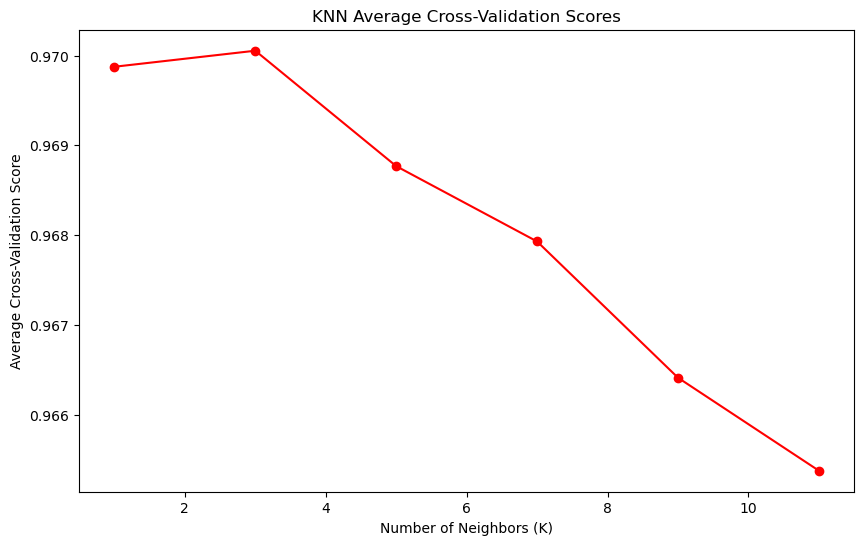

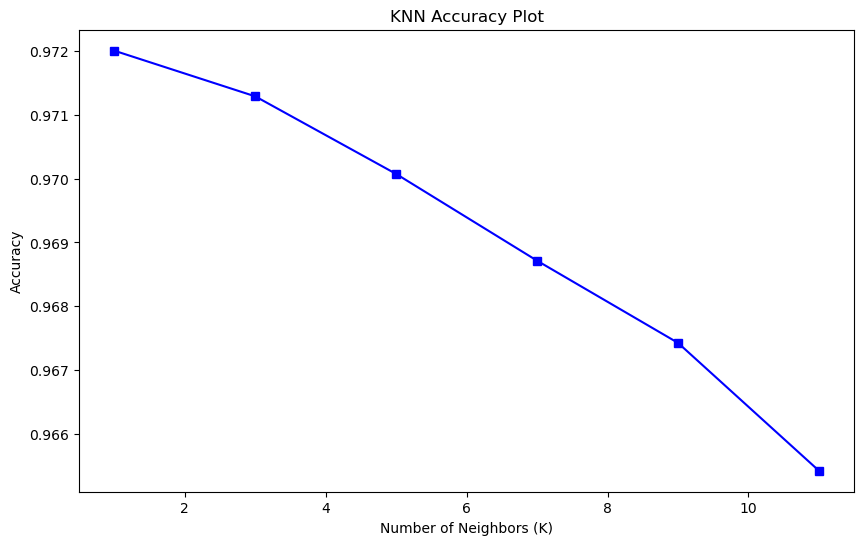

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# a range of k values to test
k_values = [1, 3, 5, 7, 9, 11]

# cross-validation score
avg_scores = []
# accuracy score
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_score = scores.mean()
    print(f"K={k}, Average Cross-Validation Score: {avg_score:.4f}")
    avg_scores.append(avg_score)

    # Fit the model for accuracy calculation
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy Score: {accuracy:.4f}")
    accuracy_values.append(accuracy)

# Plot Average Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_scores, marker='o', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Cross-Validation Score')
plt.title('KNN Average Cross-Validation Scores')
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='s', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Plot')
plt.show()

In [32]:
#train model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#make prediction
y_pred = knn_classifier.predict(X_test)

In [34]:
#print the result
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1335    0    5    0    0    0    1    1    1    0]
 [   0 1591    3    0    1    1    0    3    0    1]
 [   8   14 1333    1    1    1    4   13    3    2]
 [   0    3   12 1382    0   10    2   10    7    7]
 [   3    9    1    0 1248    0    2    4    1   27]
 [   4    5    0   13    4 1234   12    0    1    0]
 [   5    1    0    0    4    3 1383    0    0    0]
 [   1   17    4    0    2    0    0 1467    1   11]
 [   6   13    8   21    4   16    3    6 1269   11]
 [   6    6    3   14   20    0    0   14    1 1356]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      

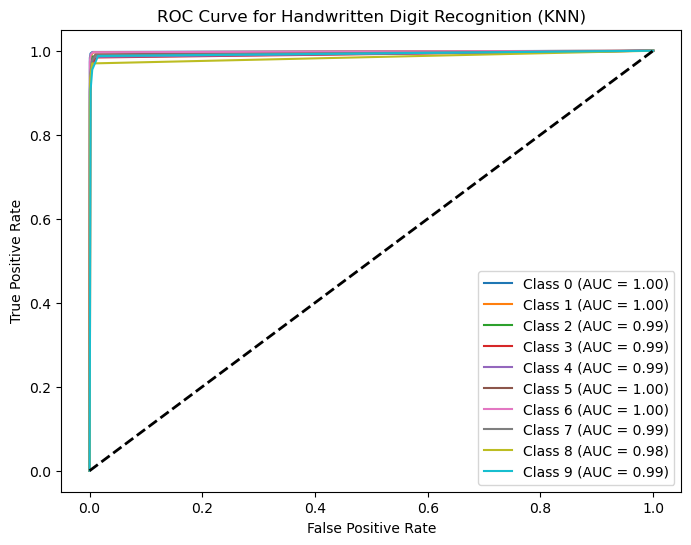

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Binarize the labels for multi-class ROC
y_train_bin = label_binarize(y_train, classes=list(range(10)))
y_test_bin = label_binarize(y_test, classes=list(range(10)))

# Initialize the KNN classifier
knn_evaluete = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

# Fit the model
knn_evaluete.fit(X_train, y_train_bin)

# Get decision function scores
y_score = knn_evaluete.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  # Assuming 10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Handwritten Digit Recognition (KNN)')
plt.legend(loc="lower right")
plt.show()


In [36]:
#Export KNN model
import joblib

# Save the PCA model to a file
joblib.dump(knn_classifier, 'model_knn3.pkl')

['model_knn3.pkl']